pip install qiskit[visualization] this is basic setup with visualization
pip install qiskit-ibm-runtime , this is for actual quantum hardware support

This is a bell state algorithm where i will be proving the quantum entanglement concept. 
qubits q1 is in superposition of 0 or 1 (using hadamard gate), if i measure one then the other one also collapses at a particular state. 
I will be putting first qubit in superposition and then apply CNOT gate with q1 as control and q2 as target

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


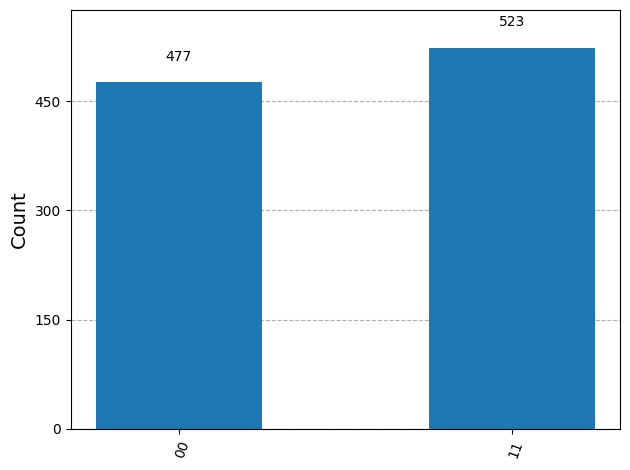

In [64]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Step 1: Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2, 2)

# Step 2: Apply Hadamard to qubit 0
qc.h(0)
# Step 3: Apply CNOT (control=0, target=1)
qc.cx(0, 1)

# Step 4: Measure both qubits
qc.measure([0, 1], [0, 1])

# Print the circuit diagram
print(qc.draw())

# Simulate and visualize results
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the backend
compiled_qc = transpile(qc, simulator)

job = simulator.run(compiled_qc, shots=1000)

result = job.result()

counts = result.get_counts()

plot_histogram(counts)


Now trying the same with AerSimulator

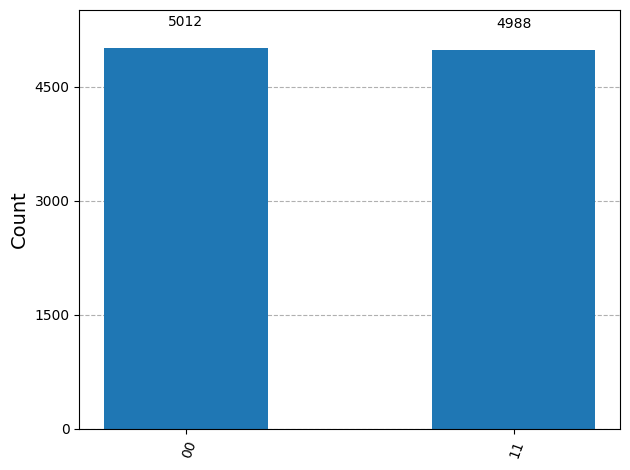

In [72]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram

# Step 1: Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2, 2)

# Step 2: Apply Hadamard to qubit 0
qc.h(0)
# Step 3: Apply CNOT (control=0, target=1)
qc.cx(0, 1)

# Step 4: Measure both qubits
qc.measure([0, 1], [0, 1])

# Simulate and visualize results
# simulator = Aer.get_backend('qasm_simulator')
simulator = AerSimulator()

# Transpile the circuit for the backend
compiled_qc = transpile(qc, simulator)

job = simulator.run(compiled_qc, shots=10000)

result = job.result()

counts = result.get_counts()

plot_histogram(counts)


This is just for experimental understanding


result:  Result(backend_name='qasm_simulator', backend_version='0.17.1', job_id='0f57f4bf-6657-41fd-a746-1b0bcf4818fe', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0xb': 66, '0xa': 67, '0x4': 51, '0x2': 68, '0x0': 45, '0x1': 73, '0xf': 70, '0xd': 56, '0x6': 71, '0x8': 59, '0xc': 43, '0xe': 73, '0x9': 66, '0x5': 65, '0x3': 69, '0x7': 58}), header={'creg_sizes': [['c', 4]], 'global_phase': 0.0, 'memory_slots': 4, 'n_qubits': 4, 'name': 'circuit-231', 'qreg_sizes': [['q', 4]], 'metadata': {}}, status=DONE, seed_simulator=1646346285, metadata={'time_taken': 0.002305293, 'num_bind_params': 1, 'parallel_state_update': 8, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 4, 'sample_measure_time': 0.001398925, 'active_input_qubits': [0, 1, 2, 3], 'num_clbits': 4, 'remapped_qubits': False, 'runtime_parameter_bind': False,

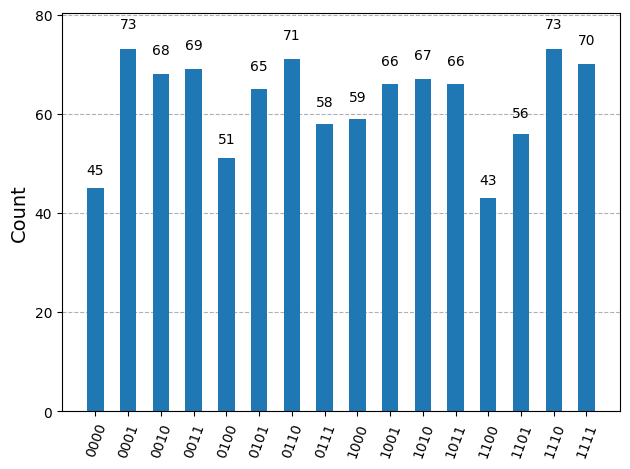

In [30]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Step 1: Create a quantum circuit with 2 qubits
qc = QuantumCircuit(4, 4)

# Step 2: Apply Hadamard to qubit 0
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

# Step 4: Measure both qubits
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# Simulate and visualize results
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the backend
compiled_qc = transpile(qc, simulator)


job = simulator.run(compiled_qc, shots=1000)

result = job.result()
print("\nresult: ", result, "\ntype: ", type(result))

counts = result.get_counts()
print("\ncounts: ", counts, "\ntype: ", type(counts))

plot_histogram(counts)
